In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's load some images from the Berkeley driving dataset.
img1 = cv2.imread('data/0a0eaeaf-9ad0c6dd.jpg')
img2 = cv2.imread('data/0a9d2d3e-50c65398.jpg')
img3 = cv2.imread('data/90775bce-a0a1817a.jpg')
img4 = cv2.imread('data/0a62ffee-85e97e08.jpg')

(-0.5, 1279.5, 719.5, -0.5)

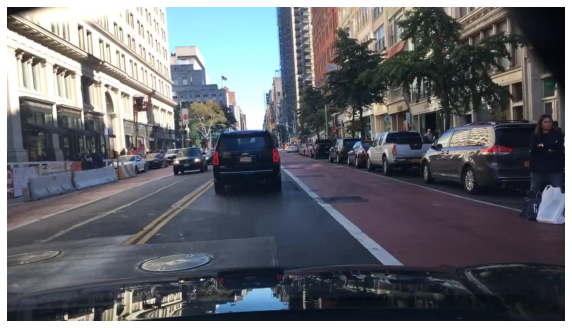

In [3]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
# NOTE: OpenCV stores images as BGR, but Matplotlib expects RGB
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

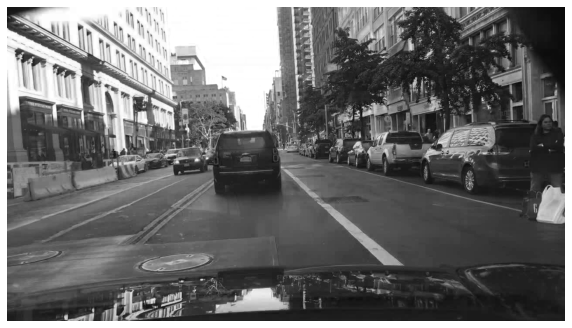

In [4]:
# We will experiment with each channel separately.
img1_blue, img1_green, img1_red = cv2.split(img1)
# First the blue channel...
fig, ax = plt.subplots(1)
fig.set_size_inches((10,8))
ax.imshow(img1_blue, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.show()

## Monadic Filters
Here are a couple useful examples: thresholding and gamma correction. 
Thresholding (`cv2.threshold` - miscellaneous transform) needs the image in grayscale.

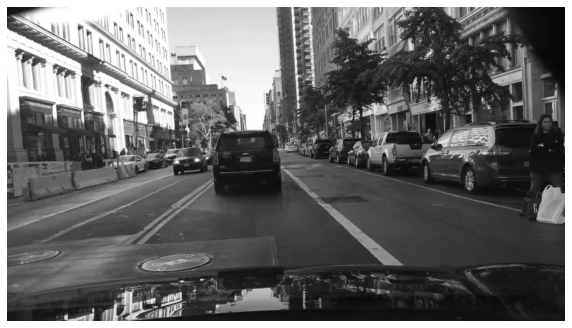

In [5]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1)
fig.set_size_inches((10,8))
ax.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.show()

In [6]:
# What's the histogram? image, channel number, image mask (not using one), number of bins, pixel range
img1_hist = cv2.calcHist([img1_gray], [0], None, [256], [0,256])

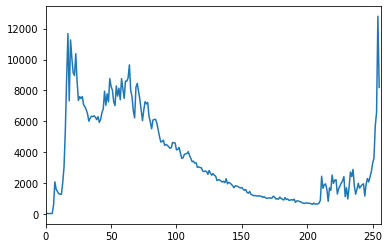

In [7]:
plt.plot(img1_hist)
plt.xlim([0,256])
plt.show()

In [8]:
_, img1_thresh = cv2.threshold(img1_gray,120,255,cv2.THRESH_BINARY)

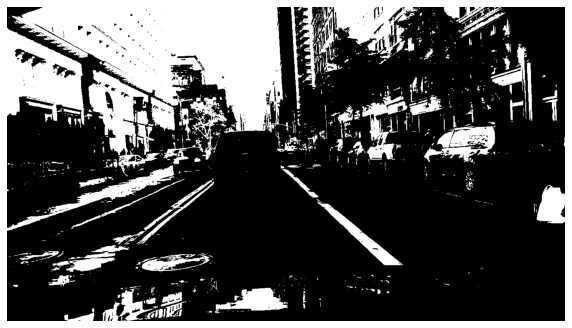

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches((10,8))
ax.imshow(img1_thresh, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.show()

That was not super great. Let's perform some gamma correction first.

In [10]:
# gamma < 1 => darker...gamma > 1.0 => brighter
def correct_gamma(img, gamma=1.0):
    igamma = 1.0 / gamma
    img_corr = (img1 / 255.)**igamma * 255
    return img_corr.astype('uint8')

In [11]:
img1_corr = correct_gamma(img1, gamma=1.5)

(-0.5, 1279.5, 719.5, -0.5)

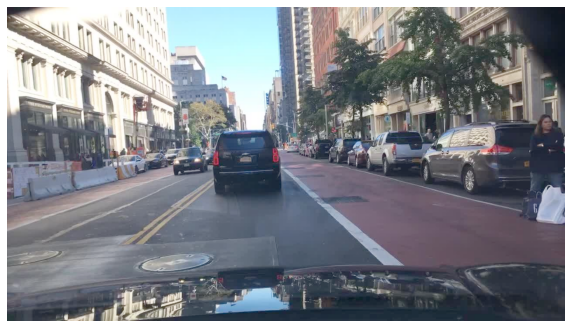

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.cvtColor(img1_corr, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Spatial Operations
These filters use a neighborhood around a chosen input point, $(u,v)$, to generate an output point in outuput image $O$.

In [13]:
# Simple blur with a 21x21 kernel
n = 11
K = np.ones((n,n), np.float32) / (n**2)

In [14]:
img1_smooth = cv2.filter2D(img1,-1,K)

(-0.5, 1279.5, 719.5, -0.5)

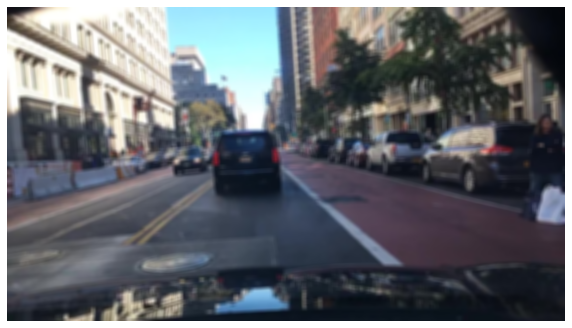

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.cvtColor(img1_smooth, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [16]:
# A Gaussian blur performs a weighted average with a kernel that has values 
# computed from a Gaussian distribution
ksize = (7,7)
# Passing in 0 for sigmaX results in a std dev computed based on kernel size. I am using the gamma corrected image.
img1_gauss = cv2.GaussianBlur(img1_corr, ksize, sigmaX=0)
print("Gaussian kernel:\n")
# We can look at the Gaussian kernel with the following function:
print(cv2.getGaussianKernel(ksize=7, sigma=0))

Gaussian kernel:

[[0.03125 ]
 [0.109375]
 [0.21875 ]
 [0.28125 ]
 [0.21875 ]
 [0.109375]
 [0.03125 ]]


(-0.5, 1279.5, 719.5, -0.5)

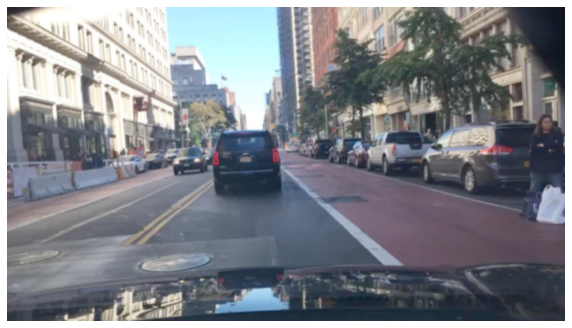

In [17]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.cvtColor(img1_gauss, cv2.COLOR_BGR2RGB))
plt.axis('off')

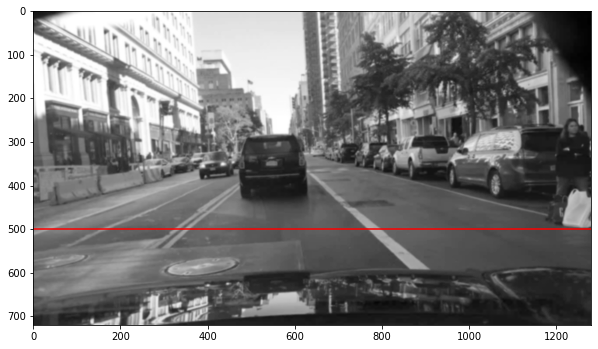

In [18]:
img1_gauss_gray = cv2.cvtColor(img1_gauss, cv2.COLOR_BGR2GRAY)
# Let's examine a single row across the middle of the image
h = 500
img1_row = img1_gauss_gray[h, :]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(img1_gauss_gray, cmap='gray')
plt.plot([0,img1_gauss_gray.shape[1]-1],[h,h], 'r-')
plt.axis('on')
plt.show()

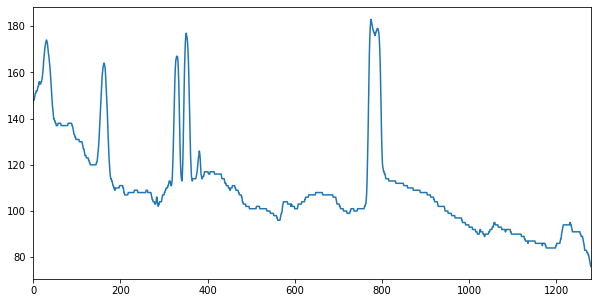

In [19]:
# Let's see the 1D signal
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,5))
plt.plot(img1_row)
plt.xlim(0,1280)
plt.show()

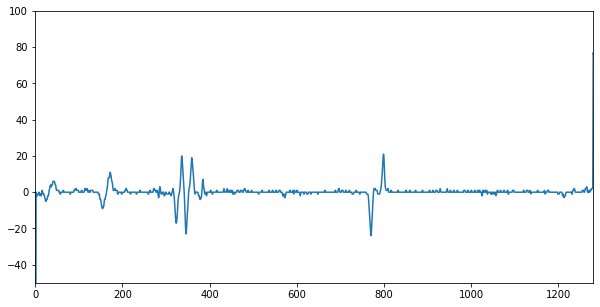

In [20]:
# I can convolve with the 1D difference filter. Something interesting will show up!
img1_row_d = np.convolve(img1_row, np.array([-1,0,1]))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,5))
plt.plot(img1_row_d)
plt.xlim(0,1280)
plt.ylim(-50,100)
plt.show()

In [21]:
# The Sobel filter is a 2D weighted derivative. You convolve the image with each direction.
S_x = cv2.Sobel(img1_gauss_gray,cv2.CV_64F,1,0,ksize=3)
S_y = cv2.Sobel(img1_gauss_gray,cv2.CV_64F,0,1,ksize=3)

(-0.5, 1279.5, 719.5, -0.5)

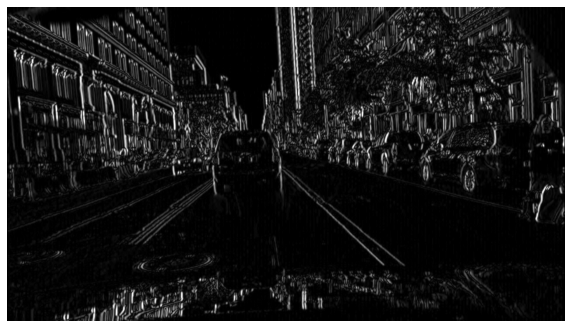

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.convertScaleAbs(S_x), cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 719.5, -0.5)

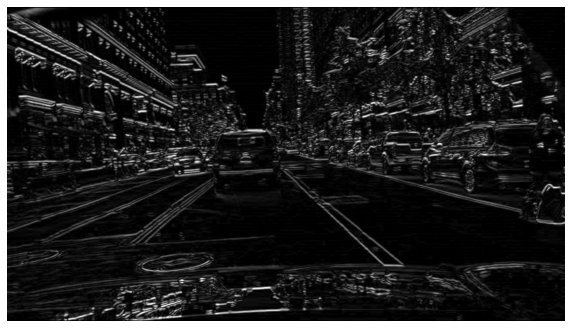

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.convertScaleAbs(S_y), cmap='gray')
plt.axis('off')

In [24]:
# Now we put them together! Need to compute their magnitude.
img1_gradmag = np.sqrt(np.square(S_x) + np.square(S_y))

(-0.5, 1279.5, 719.5, -0.5)

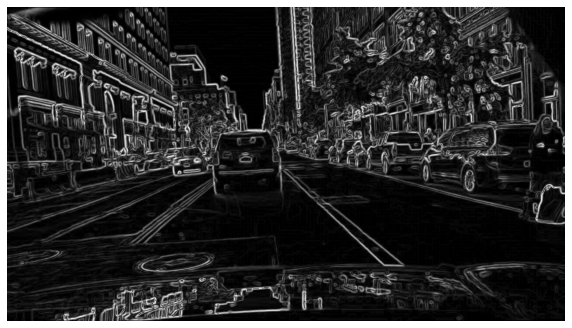

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(np.abs(img1_gradmag).astype(np.uint8), cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 719.5, -0.5)

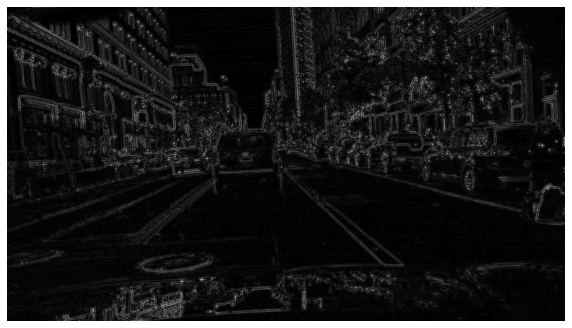

In [26]:
# The Laplacian applies a second derivative
img1_laplacian = cv2.Laplacian(img1_gauss_gray, cv2.CV_16S, ksize=3)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(cv2.convertScaleAbs(img1_laplacian), cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 719.5, -0.5)

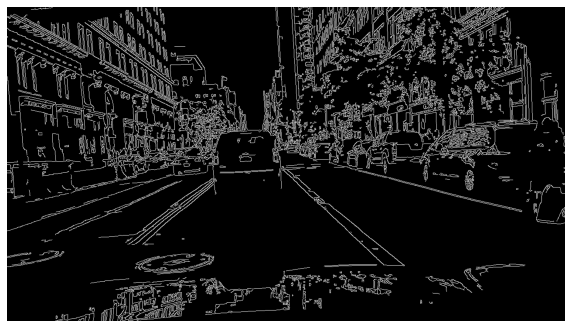

In [27]:
# Let's use a Canny detector for finding edges!
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_canny = cv2.Canny(img1_gray,100,200)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(img1_canny, cmap='gray')
plt.axis('off')

## Hough Transform - Finding Lines
Motivation: lines are described in polar form. 
For every edge point in an image, compute the family of lines over a discretized parameter space.
Intersections in parameter space indicate an $(r,\theta)$ solution for a line that fits those image points.

In [28]:

rho = 1 # pixel discretization
thetas = [i*np.pi / 180 for i in range(0,360)]
def polar_line(pt, theta):
    return pt[0]*np.cos(theta) + pt[1]*np.sin(theta)

In [29]:
rs1 = polar_line((8,6), thetas)
rs2 = polar_line((4,9), thetas)
rs3 = polar_line((12,3), thetas)

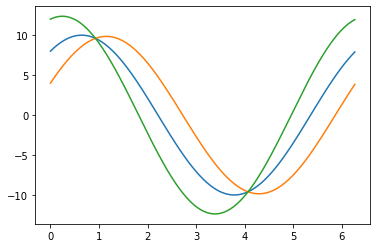

In [30]:
plt.plot(thetas, rs1)
plt.plot(thetas, rs2)
plt.plot(thetas, rs3)
plt.show()

Hough line transform on our street image...

In [31]:
from math import cos, sin
lines = cv2.HoughLines(img1_canny, 1, np.pi / 180, 300, None, 0, 0)
lines = lines.reshape(lines.shape[0], 2)

In [32]:
hough_lines = []
if lines is not None:
    for line in lines:
        r = line[0]
        theta = line[1]
        a = cos(theta)
        b = sin(theta)
        x0 = a * r
        y0 = b * r
        hough_lines.append(np.array([int(x0 + 1000*(-b)), int(y0 + 1000*(a)), int(x0 - 1000*(-b)), int(y0 - 1000*(a))]))
print("We have {0} lines.".format(len(hough_lines)))

We have 5 lines.


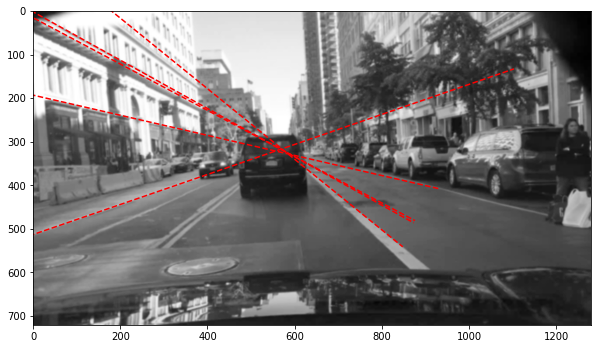

In [33]:
img1_row = img1_gauss_gray[h, :]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,8))
plt.imshow(img1_gauss_gray, cmap='gray')
for l in hough_lines:
    plt.plot([l[0],l[2]],[l[1],l[3]], 'r--')
plt.axis('on')
plt.xlim(0,1280)
plt.ylim(720,0)
plt.show()